# 使用scikit-image进行仿射变换
本笔记本演示如何对3D图像应用仿射变换。

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
# Laod example data
np_array = imread('../../data/Haase_MRT_tfl3d1.tif')
np_array.shape

(192, 256, 256)

要设置仿射变换，可以使用4x4的变换矩阵来完成：

In [3]:
transform_matrix = np.asarray([
    [1, 0, 0, 50],
    [0, 2, 0, 0],
    [0, 0, 0.5, 0],
    [0, 0, 0, 1]
])

Scikit-image只支持2D变换，因此我们选择一个切片来进行变换：

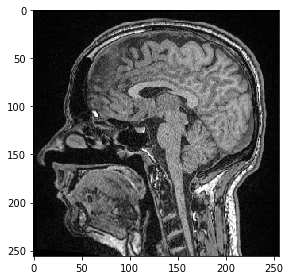

In [4]:
# pull image stack from GPU and pick a slice
image = np_array[100]

from skimage.io import imshow
imshow(image)

现在我们使用scikit-image定义一个仿射变换并将其应用于图像。

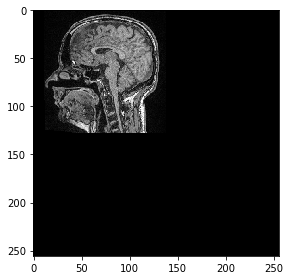

In [5]:
from skimage import transform as tf

# define transform with #scikit image
transform = tf.AffineTransform(scale=0.5, translation=[10,0])

transformed_image = tf.warp(image, transform.inverse)
imshow(transformed_image)

## 与clesperanto的互操作性
接下来，我们将这个单平面图像推送到GPU，并使用pyclesperanto进行变换

In [6]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:14: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


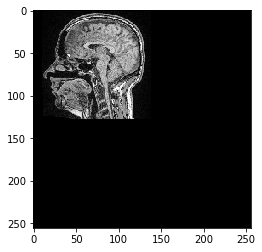

In [7]:
image_gpu = cle.push(image)

# define transform with #scikit image
from skimage import transform as tf
transform = tf.AffineTransform(scale=0.5, translation=[10,0])

transformed_image = cle.affine_transform(image_gpu, transform=transform)
cle.imshow(transformed_image, color_map="Greys_r")